In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chocolate-sales/Chocolate Sales.xlsx
/kaggle/input/chocolate-sales/Chocolate Sales.csv


# Análise Gráfica de Agrupamentos das Vendas de Chocolate

*O objetivo deste projeto é entender os agrupamentos de cada variável presente no dataset, responder perguntas relacionadas as vendas de chocolate e visualizar a distribuição dos dados númericos atráves de gráficos estatísticos.*

*Perguntas que serão análisadas ao decorrer do projeto:*

* Qual o tipo de chocolate que gerou mais receita ?

* Qual o vendedor que mais vendeu ?

* Qual o país que vendeu mais chocolate ?

* Qual a quantidade de caixas vendidas por cada vendedor ?

* Qual a quantidade de caixas vendidas por cada país ?

* Qual a quantidade de caixas vendidas por cada tipo de chocolate ?

* Qual o mês em que ocorreu a maior receita ?

*Este projeto está distribuido de acordo com cada pergunta estabelecida*


In [2]:
# Bibliotecas que serão utilizadas

# Bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Remover os avisos
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/chocolate-sales/Chocolate Sales.csv')
df.head() # Análise inicial das 5 primeiras linhas do dataset

#OBS: É preciso alterar a formatação da coluna Amount e Date, pois elas precisam estar nos formatos corretos
# É necessário esse tratamento para poder criar os gráficos númericos

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [4]:
# Quantidade de linhas e colunas presentes no dataset
# 1094 linhas x 6 colunas
df.shape

(1094, 6)

In [5]:
# Verificando se tem valores nulos, qual o tipo dos dados e a quantidade de colunas no dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [6]:
# Tratamento da coluna Amount, transformação em númerica e convertendo para o formato do real
df['Amount'] = df['Amount'].str.slice(start = 1)
df['Amount'] = df['Amount'].str.replace(',','')
df['Amount'] = df['Amount'].astype(float)

In [7]:
# Transformação da coluna Date em formato categórico para DateTime
df['Date'] = pd.to_datetime(df['Date'])

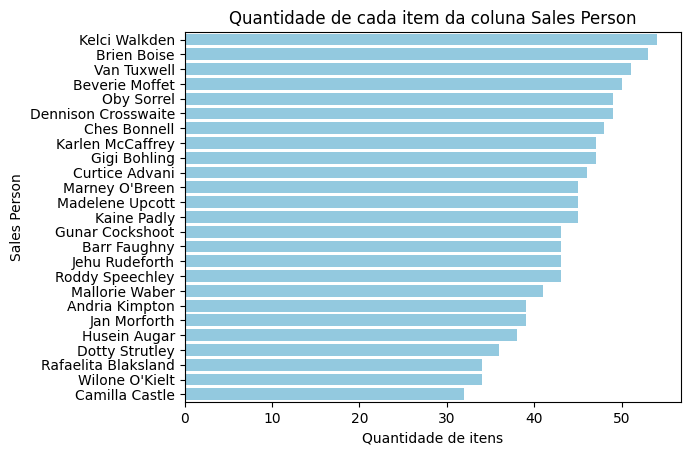

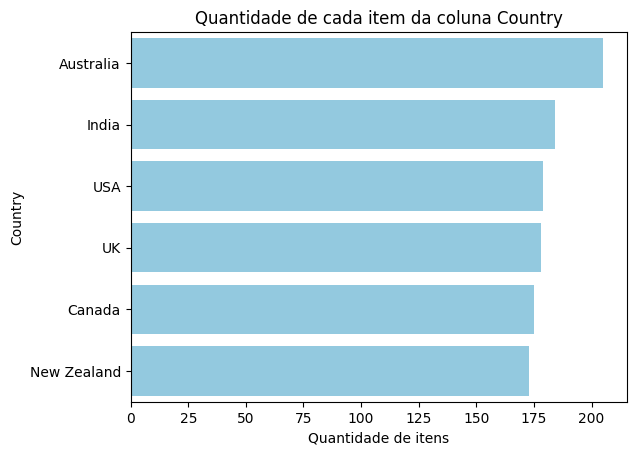

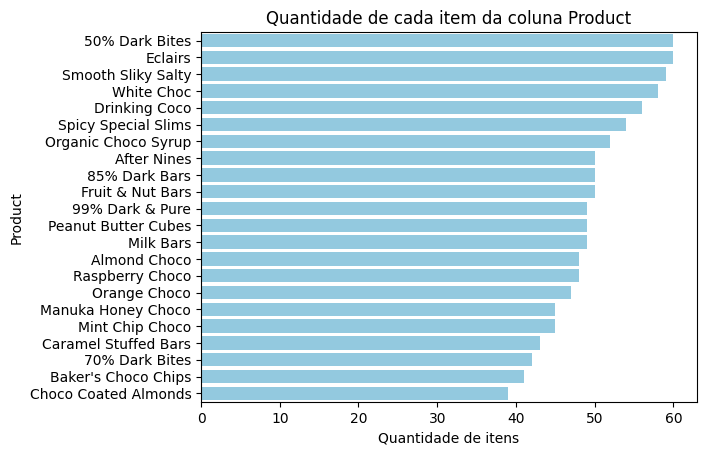

In [8]:
# Visualizando os agrupamentos de dados categóricos
# Quantidade de cada item presente em cada coluna categórica
colunas_categoricas = df.select_dtypes(include = 'object').columns

for col in colunas_categoricas:
    agrupamento = df.groupby(col).size().reset_index(name = 'Quantidade').sort_values(by = 'Quantidade',ascending = False)
    sns.barplot(x = agrupamento['Quantidade'].values, y = agrupamento[col].values, color = 'skyblue')
    plt.title(f'Quantidade de cada item da coluna {col}')
    plt.xlabel('Quantidade de itens')
    plt.ylabel(col)
    plt.show()

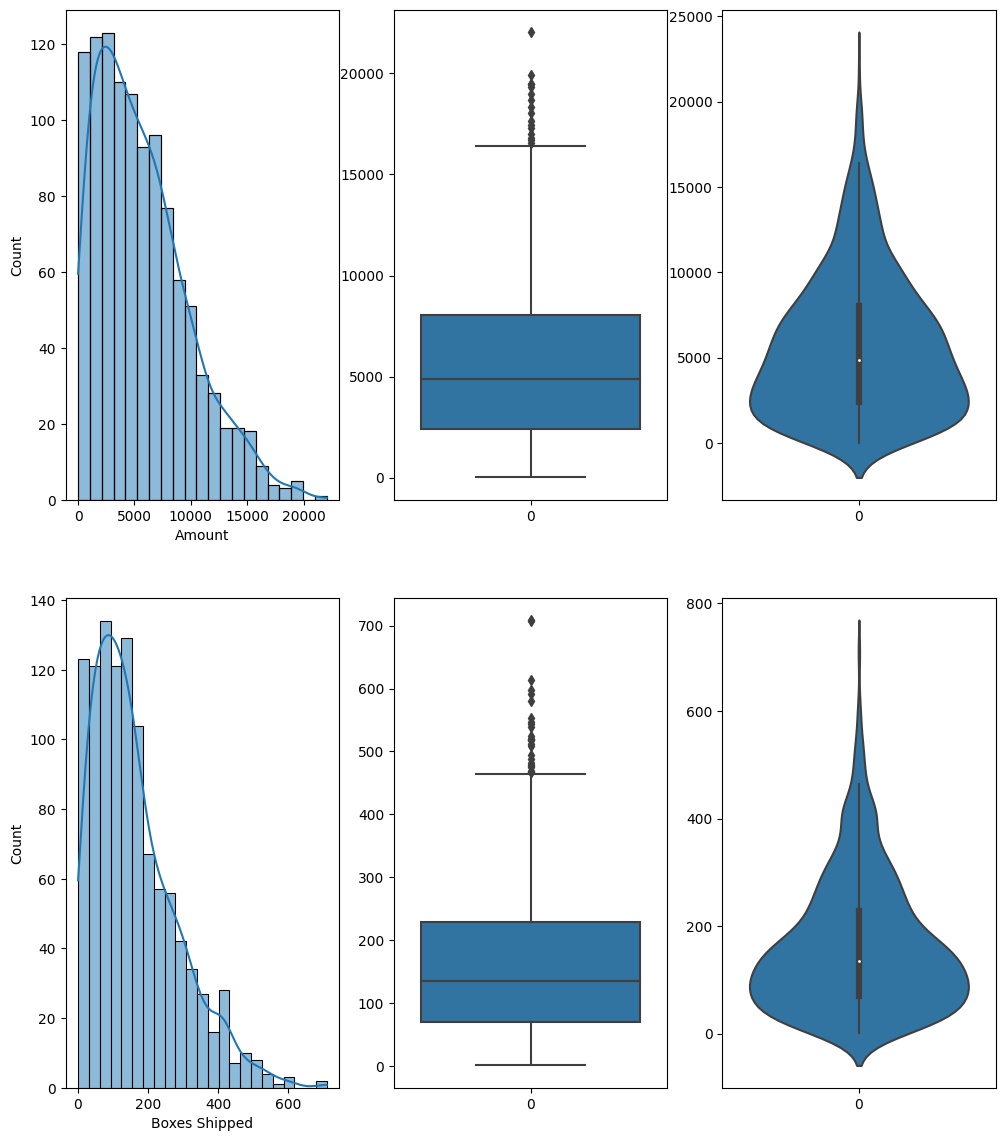

In [9]:
# Verificando os outliers (Valores acima da mediana ou abaixo) das colunas númericas
# A verificação é feita atráves de gráficos de histplot, boxplot e violinplot
colunas_numericas = df.select_dtypes(exclude = ['object','datetime']).columns

fig, axs = plt.subplots(len(colunas_numericas), 3, figsize = (12, 7 * len(colunas_numericas)))

for i, col in enumerate(colunas_numericas):
    sns.histplot(df[col], ax = axs[i][0], kde = True)
    sns.boxplot(df[col], ax = axs[i][1])
    sns.violinplot(df[col], ax = axs[i][2])

plt.show()

In [10]:
# Análisando os valores máximos e mínimos das variáveis númericas
df.describe()

,Date,Amount,Boxes Shipped
count,1094,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000
max,2022-08-31 00:00:00,22050.000000,709.000000
std,NaN,4102.442014,121.544145


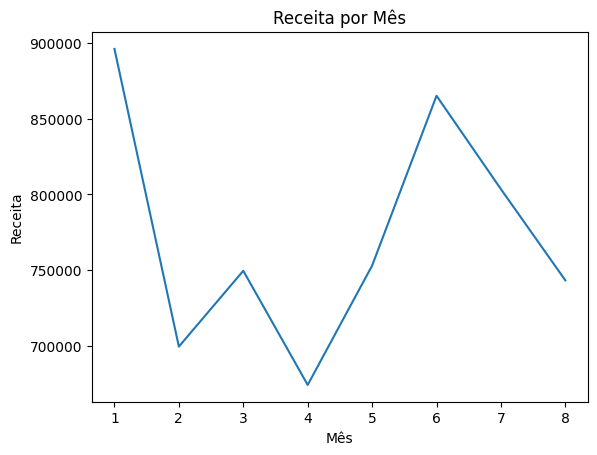

In [11]:
# Análisando o faturamento de cada mês no formato de número
agrupamento = df.groupby(df['Date'].dt.month)['Amount'].sum()
plt.title('Receita por Mês')
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.plot(agrupamento)

In [12]:
agrupamento = df.groupby(df['Date'].dt.month)['Amount'].sum()
agrupamento

Date
1    896105.0
2    699377.0
3    749483.0
4    674051.0
5    752892.0
6    865144.0
7    803425.0
8    743148.0
Name: Amount, dtype: float64

# Qual o mês em que ocorreu a maior receita ?

*O mês que gerou a maior receita foi em JANEIRO com a receita de $896,105.0 dólares*

*O mês que gerou a menor receita foi em ABRIL com a receita de $674,051.0 dólares*

<Axes: xlabel='Amount', ylabel='Boxes Shipped'>

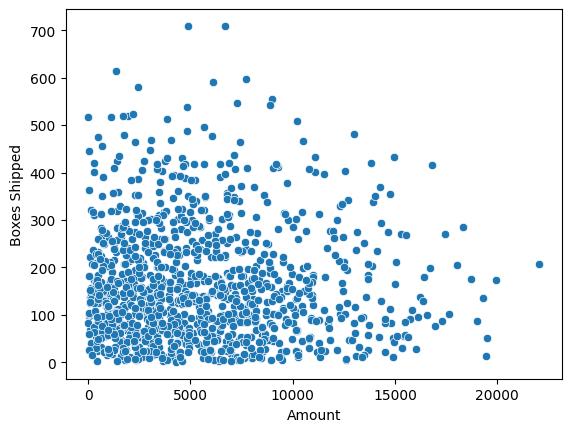

In [13]:
# Verificando a dispersão das colunas Amount e Boxes Shipped
sns.scatterplot(x = df['Amount'], y = df['Boxes Shipped'])

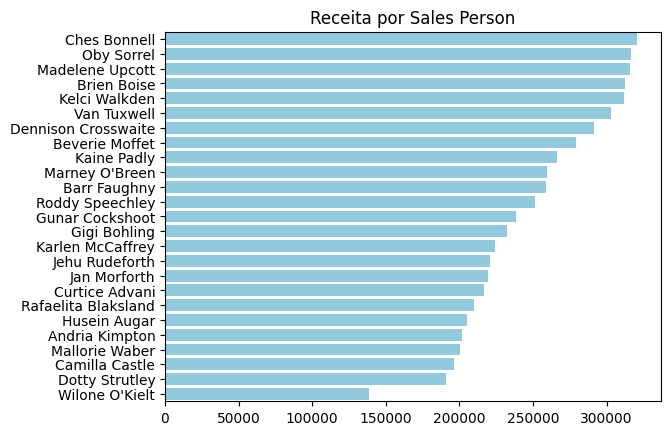

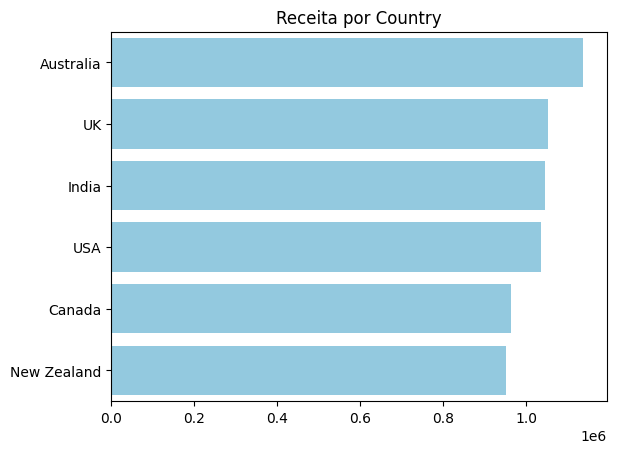

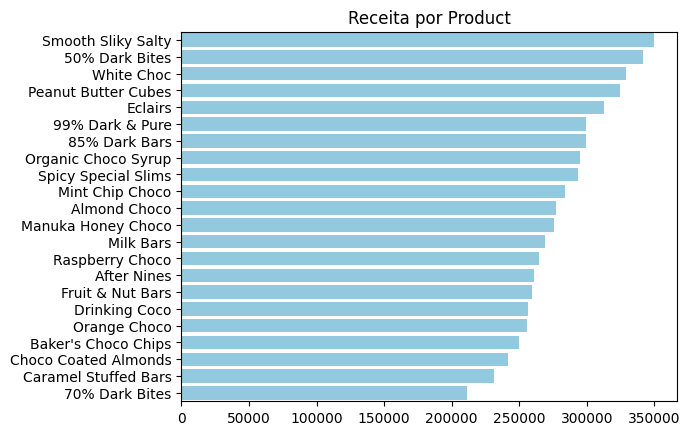

In [14]:
# Verificando o faturamento de acordo com as colunas categóricas
colunas_categoricas = df.select_dtypes(include = 'object').columns

for col in colunas_categoricas:
    agrupamento_faturamento = df.groupby(col)['Amount'].sum().reset_index(name='Receita').sort_values(by='Receita', ascending = False)
    sns.barplot(x = agrupamento_faturamento['Receita'].values, y = agrupamento_faturamento[col].values, color = 'skyblue')
    plt.title(f'Receita por {col}')
    plt.show()
    

In [15]:
agrupamento_faturamento = df.groupby('Country')['Amount'].sum().reset_index(name='Receita').sort_values(by='Receita', ascending = False)
agrupamento_faturamento

,Country,Receita
0,Australia,1137367.0
4,UK,1051792.0
2,India,1045800.0
5,USA,1035349.0
1,Canada,962899.0
3,New Zealand,950418.0


# Qual o tipo de chocolate que gerou mais receita ?

*O tipo de chocolate que mais gerou receita foi o Smooth Sliky Salty com o faturamento de $349,692.0 dólares*

# Qual o vendedor que mais vendeu ?

*O vendedor que mais gerou receita foi o Ches Bonnel com a receita de $320,901.0 dólares*

# Qual o país em que vendeu mais chocolate?

*O país que mais gerou receita foi a AUSTRÁLIA com a receita de $1137,367.0 dólares*

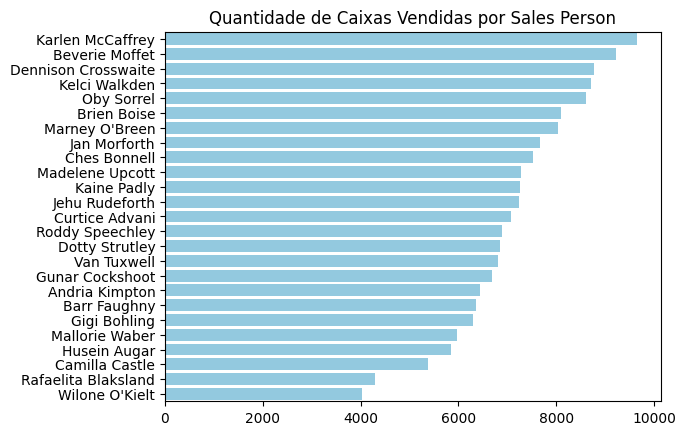

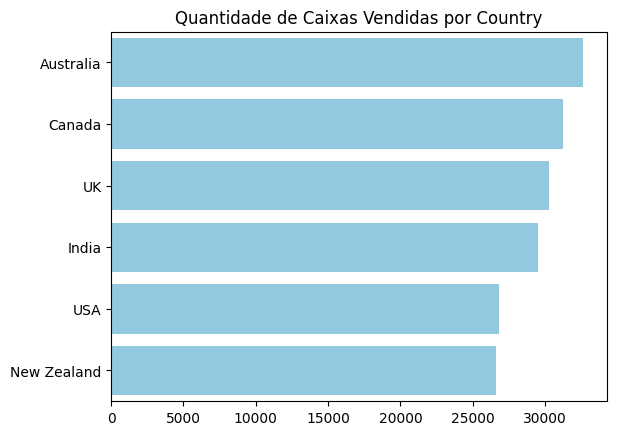

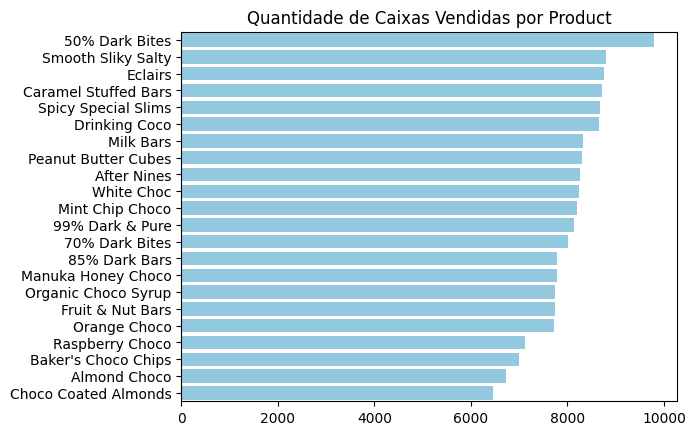

In [16]:
# Verificando a quantidade de caixas vendidas por colunas categóricas
for col in colunas_categoricas:
    agrupamento_caixas_vendidas = df.groupby(col)['Boxes Shipped'].sum().reset_index(name='Caixas Enviadas').sort_values(by='Caixas Enviadas', ascending = False)
    sns.barplot(x = agrupamento_caixas_vendidas['Caixas Enviadas'].values, y = agrupamento_caixas_vendidas[col].values, color = 'skyblue')
    plt.title(f'Quantidade de Caixas Vendidas por {col}')
    plt.show()

 # Qual a quantidade de caixas vendidas por cada vendedor ?


In [17]:
agrupamento_caixas_vendidas = df.groupby('Sales Person')['Boxes Shipped'].sum().reset_index(name='Caixas Enviadas').sort_values(by='Caixas Enviadas', ascending = False)
print(agrupamento_caixas_vendidas)

           Sales Person  Caixas Enviadas
15     Karlen McCaffrey             9658
2        Beverie Moffet             9214
7   Dennison Crosswaite             8767
16        Kelci Walkden             8702
20           Oby Sorrel             8608
3           Brien Boise             8102
19       Marney O'Breen             8043
12         Jan Morforth             7661
5          Ches Bonnell             7522
17      Madelene Upcott             7279
14          Kaine Padly             7253
13       Jehu Rudeforth             7246
6        Curtice Advani             7074
22      Roddy Speechley             6899
8        Dotty Strutley             6853
23          Van Tuxwell             6799
10      Gunar Cockshoot             6677
0        Andria Kimpton             6448
1          Barr Faughny             6366
9          Gigi Bohling             6303
18       Mallorie Waber             5980
11         Husein Augar             5849
4        Camilla Castle             5374
21  Rafaelita Bl

# Qual a quantidade de caixas vendidas por cada país ?

In [18]:
agrupamento_caixas_vendidas = df.groupby('Country')['Boxes Shipped'].sum().reset_index(name='Caixas Enviadas').sort_values(by='Caixas Enviadas', ascending = False)
print(agrupamento_caixas_vendidas)

       Country  Caixas Enviadas
0    Australia            32647
1       Canada            31221
4           UK            30265
2        India            29470
5          USA            26824
3  New Zealand            26580


# Qual a quantidade de caixas vendidas por cada tipo de chocolate ?

In [19]:
agrupamento_caixas_vendidas = df.groupby('Product')['Boxes Shipped'].sum().reset_index(name='Caixas Enviadas').sort_values(by='Caixas Enviadas', ascending = False)
print(agrupamento_caixas_vendidas)

                 Product  Caixas Enviadas
0         50% Dark Bites             9792
19    Smooth Sliky Salty             8810
10               Eclairs             8757
7   Caramel Stuffed Bars             8717
20   Spicy Special Slims             8685
9          Drinking Coco             8660
13             Milk Bars             8330
17   Peanut Butter Cubes             8304
4            After Nines             8257
21            White Choc             8240
14       Mint Chip Choco             8207
3        99% Dark & Pure             8127
1         70% Dark Bites             8015
2          85% Dark Bars             7793
12    Manuka Honey Choco             7781
16   Organic Choco Syrup             7749
11      Fruit & Nut Bars             7738
15          Orange Choco             7732
18       Raspberry Choco             7115
6    Baker's Choco Chips             6998
5           Almond Choco             6736
8   Choco Coated Almonds             6464
